In [7]:
def topoSort(G):
    n = len(G)
    visited = [False]*n
    t = []

    def dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(v)
        t.append(u)

    for u in range(n):
        if not visited[u]:
            dfs(u)

    return list(reversed(t))

In [2]:
%%file 1.in
9
Greese/Flour Pan
Add Banter to Pan
Mix Ingredients
Make Frosting
Bake Cake
Preheat Oven
Cool Cake
Frost Cake
Eat Dessert :)
0 1
2 1
1 4
3 7
4 6
5 4
6 7
7 8

Writing 1.in


In [3]:
with open('1.in') as f:
    n = int(f.readline().strip())
    labels = [f.readline().strip() for _ in range(n)]
    G = [[] for _ in range(n)]
    for line in f:
        u, v = map(int, line.strip().split())
        G[u].append(v)

In [4]:
G

[[1], [4], [1], [7], [6], [4], [7], [8], []]

In [8]:
t = topoSort(G)
print(t)
[labels[u] for u in t]

[5, 3, 2, 0, 1, 4, 6, 7, 8]


['Preheat Oven',
 'Make Frosting',
 'Mix Ingredients',
 'Greese/Flour Pan',
 'Add Banter to Pan',
 'Bake Cake',
 'Cool Cake',
 'Frost Cake',
 'Eat Dessert :)']

In [9]:
from upc import showG

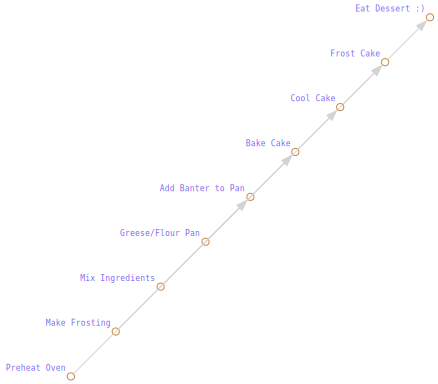

In [17]:
coords = [None for _ in range(len(G))]
for i, u in enumerate(t):
    coords[u] = (i, i)
showG(G, directed=True, labels=labels, coords=coords, layout="neato", xlabels=True)

In [20]:
def kosaraju(G):
    n = len(G)
    visited = [False]*n
    f = []
    # multipurpose dfs
    def dfs(G, u, t):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                dfs(G, v, t)
        t.append(u)

    # Find the finalization order
    for u in range(n):
        if not visited[u]:
            dfs(G, u, f)

    # create reverse graph
    Grev = [[] for _ in range(n)]
    for u in range(n):
        for v in G[u]:
            Grev[v].append(u)

    # finding scc
    scc = []
    visited = [False]*n
    for u in reversed(f):
        if not visited[u]:
            c = []
            dfs(Grev, u, c)
            scc.append(c)

    return scc

In [ ]:
G = [[1],
     [2],
     [3, 4],
     [0],
     [4],
     [6],
     [4, 7],]

In [21]:
kosaraju(G)

[[5], [3], [2], [0], [1], [4], [6], [7], [8]]